In [1]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [2]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in range(10):
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

100

# TODO: Winner's stats synapse.
# TODO: Bio_hebbian stats synapse.
# TODO: Stats synapse for each rez.synapse, not only for winners.
# TODO: Stats synapse for winners and second after winner.
# TODO: Push stats synapses.
# TODO: Rezonanse synapse via avg(or meadian) input. AVG input as dW!

In [88]:
layer_size = 10*4
c = 4

I = np.zeros(n_mnist_pixels)
O = np.zeros(layer_size)
W = np.random.rand(O.size, I.size) * 0.001
AVG_I_CNT = np.zeros(W.shape)
AVG_I = np.zeros(W.shape)
print('W', W.shape, W.max(), W.min(), np.median(W))

push_delta = 0.4
k = 1

prec = 1e-30

epoch_cnt = 100
eps0 = 0.0085*2.5

lr = 0.085

for epoch_idx in range(epoch_cnt):
    eps = (epoch_cnt - epoch_idx) * eps0

    for i_idx in samples_idx:
        img = mndata.train_images[i_idx]

        # infer
        I = np.array(img) / 255

        DO = np.exp((W - I)**2 * -20.0)
        O = np.sum(DO, axis=1)
        # print(O)

        # train
        winner_ids = np.argsort(O)[::-1]

        D = np.zeros(O.shape)
        D[winner_ids[0]] = 1
        D[winner_ids[1:1+k]] = -push_delta
        D = D[np.newaxis].T

        win = winner_ids[0]
        if np.max(AVG_I[win]) <= 0:
            AVG_I[win] = I[win]
        else:
            AVG_I[win] = AVG_I[win] + ((I[win] - AVG_I[win]) / AVG_I_CNT[win])
        AVG_I_CNT[win] += 1

        # update
        O /= np.max(np.abs(O))
        O = O[np.newaxis].T

        W[win] = W[win] * (1 - lr) + AVG_I[win] * lr

print('W', W.shape, W.max(), W.min(), np.median(W))


W (40, 784) 0.0009999722100389296 5.0802714226083625e-08 0.0004946910918487205
W (40, 784) 0.0009999722100389296 5.0802714226083625e-08 0.0004946910918487205


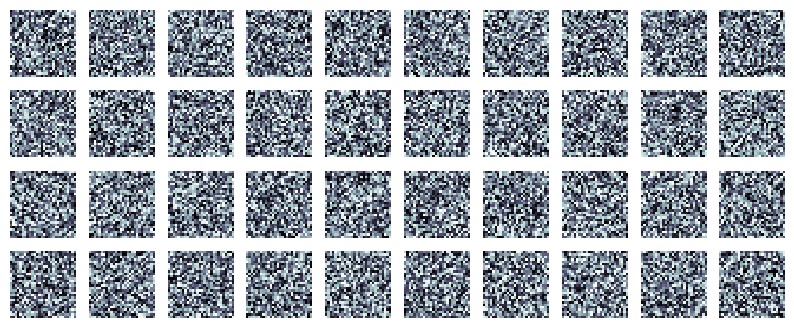

In [89]:
row_size = 10
col_size = int(layer_size / row_size)

figure(figsize=(row_size, col_size))

for col_idx in range(col_size):
    for row_idx in range(row_size):
        n_W_idx = col_idx * row_size + row_idx

        aimg = W[n_W_idx].reshape(img_side, img_side)

        subplot(col_size, row_size, n_W_idx + 1)

        imshow(aimg, interpolation='none', aspect='auto', cmap='bone')
        axis("off")

show()
